In [35]:
from JupyterImport import *
from src.DatObject.Attributes import Transition as T
root_logger.setLevel(logging.WARNING)

In [50]:
dat = get_dat(595)  # This is the Entropy dat that made us think to look at this... This should be ~100mK cold ~<130mK hot. 

dats = get_dats(range(773, 802+1))
start_dat = 2  # 2 == Dat595 for gamma broadening, 0 is most gamma broadened, 4 is least (and is weakly coupled)

100% (30 of 30) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


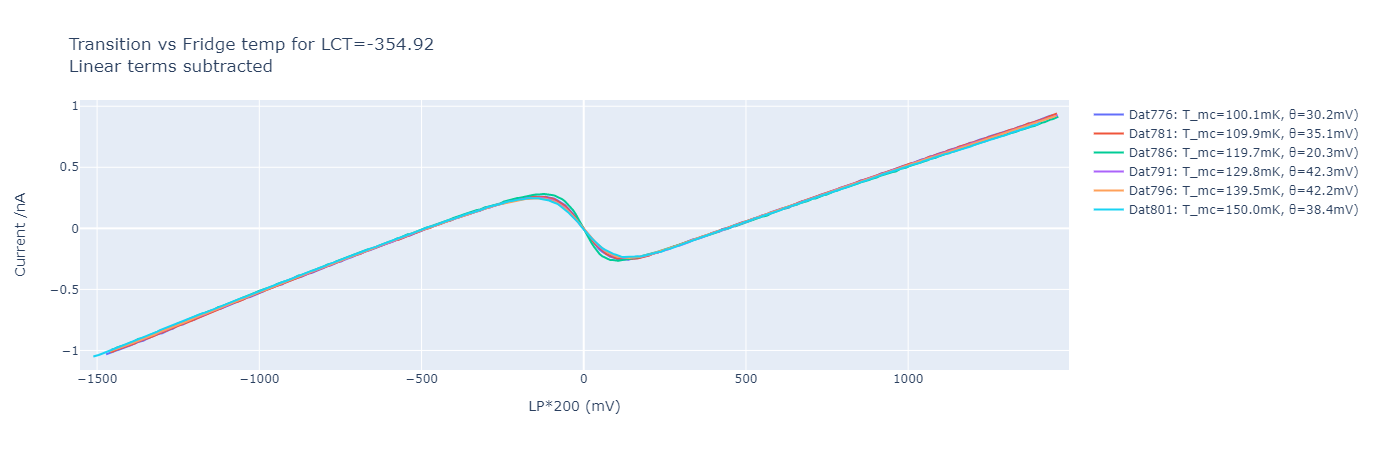

In [52]:
xs, datas, ids, titles = list(), list(), list(), list()
fig_all = go.Figure()

ds = dats[start_dat::5]
first_fit = ds[0].Transition.avg_fit
for dat in ds:
    indv_fit = dat.Transition.avg_fit
    x = dat.Transition.x
    data = dat.Transition.avg_data
    data = CU.decimate(data, dat.Logs.Fastdac.measure_freq, numpnts=400)
    x = CU.get_matching_x(x, data)
    idxs = CU.get_data_index(x, [-2000, 2000])
    x, data = x[idxs[0]:idxs[1]], data[idxs[0]:idxs[1]]
#     x, data = CU.sub_poly_from_data(x, data, first_fit)
    
    indv_fit.model = lm.models.Model(T.i_sense_digamma)
    indv_fit.params = T.get_param_estimates(x, data)[0]
    indv_fit.params.add('g', 0, True)
    indv_fit.recalculate_fit(x, data)
    
    x = x-indv_fit.best_values.mid
    data = data-indv_fit.best_values.const
    
    ids.append(dat.datnum)
    titles.append(f"Dat{dat.datnum}: LCT={dat.Logs.fds['LCT']}, T_mc={dat.Logs.temps.mc*1000:.1f}mK, {THETA}={dat.Transition.avg_fit.best_values.theta:.1f}mV")
    xs.append(x)
    datas.append(data)
    
    fig_all.add_trace(go.Scatter(mode='lines', x=x, y=data, name=f"Dat{dat.datnum}: T_mc={dat.Logs.temps.mc*1000:.1f}mK, {THETA}={dat.Transition.avg_fit.best_values.theta:.1f}mV)"))
    
fig_slider = PlU.get_figure(datas, xs, ids=ids, titles=titles, xlabel=dats[start_dat].Logs.x_label, ylabel='Current /nA')

fig_all.update_layout(title=f"Transition vs Fridge temp for LCT={dats[start_dat].Logs.fds['LCT']}<br>Linear terms subtracted",
                     xaxis_title=dats[start_dat].Logs.x_label,
                     yaxis_title='Current /nA')
fig_all.show()
# fig_all.write_html(export_path+f'TransitionVsFridgeTemp_LCT--{dats[0].Logs.fds["LCT"]}.html')

In [48]:
print(indv_fit.fit_report)

[[Model]]
    Model(i_sense_digamma)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 257
    # variables        = 6
    chi-square         = 0.26360968
    reduced chi-square = 0.00105024
    Akaike info crit   = -1756.76699
    Bayesian info crit = -1735.47254
[[Variables]]
    mid:    535.759135 +/- 4.77709398 (0.89%) (init = 492.3433)
    theta:  0.01974143 +/- 2405.78833 (12186494.64%) (init = 5)
    amp:    1.34456424 +/- 0.03389185 (2.52%) (init = 2.931088)
    lin:    0.00107082 +/- 8.0995e-06 (0.76%) (init = 0.001469361)
    const:  5.45961567 +/- 0.00402739 (0.07%) (init = 5.129823)
    g:      245.553015 +/- 12.0365339 (4.90%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, lin)   =  0.961
    C(amp, g)     =  0.899
    C(mid, const) =  0.833
    C(lin, g)     =  0.793
    C(theta, g)   = -0.231
    C(mid, lin)   = -0.206
    C(mid, amp)   = -0.141
    C(theta, amp) = -0.124


In [6]:
dat = get_dat(595)

In [7]:
dat.Logs.fds

{'R2T(10M)': 0,
 'TC/0.001': 0,
 'LP*2': -505.98,
 'LCB': -670.78,
 'LCT': -344.85,
 'LCSQ': -771.79,
 'LCSS': -219.73,
 'LP*200': 3000}